## MARGIN AND STOCK RISK ANALYSIS

# Overview: Margin, Stock Risk, and Day of Inventory Analysis

## 1. Margin Analysis
- Products are classified into three categories based on their profit margin (%):
  - **High Margin**: Margin ≥ 40%  
  - **Medium Margin**: 20% ≤ Margin < 40%  
  - **Low Margin**: Margin < 20%  
- This classification helps in identifying which products deliver the most profitability and which need pricing or cost strategy adjustments.

## 2. Stock Risk Analysis
- Products are categorized by comparing **stock availability** and **units sold**:
  - **Overstocked**: Stock above Q3 but sales below Q1 (risk of excess inventory).  
  - **Lowerstocked**: Stock above Q3 and sales above Q3 (risk of running out if not replenished).  
  - **Normal**: Products outside these extreme conditions, considered balanced.  
- This analysis helps avoid stockouts and reduce costs from unsold inventory.

## 3. Day of Inventory (DOI) Analysis
- Products are segmented according to their sales velocity (measured in days of inventory):  
  - **Unsold**: No sales recorded (DOI is null).  
  - **Fast-Selling**: DOI ≤ 30 days, products sold quickly.  
  - **Normal-Selling**: 30 < DOI ≤ 90 days, healthy turnover.  
  - **Slow-Selling**: DOI > 90 days, low demand or stagnant stock.  
- This classification supports decision-making for replenishment, marketing, or clearance actions.

---
Together, these three analyses provide a complete perspective on **profitability (margin), stock efficiency (risk), and sales velocity (DOI)**, enabling more effective inventory and pricing strategies.


**Importing and Understanding Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Margin Analysis**

In [2]:
df_stock = pd.read_csv('stock.csv')

In [3]:
df_stock.head()

,stock_id,date,product_name,product_category,unit_sold,price,cost,stock_available
0,DQ-M-BAD,1/1/2024,Buku Agenda DQLab,Merchandise,87,239850,149850,148
1,DQ-M-TLD,1/1/2024,Termos Logo DQLab,Merchandise,70,194850,149850,94
2,DQ-AT-SND,1/1/2024,Sticky Notes DQLab,Alat Tulis,9,59850,29850,90
3,DQ-BC-NAD,1/1/2024,Notebook A5 DQLab,Buku Catatan,17,194850,149850,87
4,DQ-M-DKD,1/1/2024,Dompet Kartu DQLab,Merchandise,25,149850,119850,55


In [4]:
df_stock.shape

(16727, 8)

In [5]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16727 entries, 0 to 16726
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stock_id          16727 non-null  object
 1   date              16727 non-null  object
 2   product_name      16727 non-null  object
 3   product_category  16727 non-null  object
 4   unit_sold         16727 non-null  int64 
 5   price             16727 non-null  int64 
 6   cost              16727 non-null  int64 
 7   stock_available   16727 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.0+ MB


**Data Preparation and Feature Engineering**

In [8]:
#Convert date column
df_stock['date'] = pd.to_datetime(df_stock['date'], format='%m/%d/%Y')

In [9]:
#filtering for October
df_stock = df_stock[df_stock['date'].dt.month == 10]

In [13]:
#Calculate margin
df_stock['margin'] = round((df_stock['price'] - df_stock['cost']) / df_stock['price'] *100, 2)

In [14]:
#Group by product_name and calculate mean of margin
df_stock = df_stock.groupby('product_name', as_index=False).agg({
    'margin' : 'mean',
    'price' : 'mean',
    'cost' : 'mean',
    'stock_available' : 'sum'
})

In [15]:
#Order by margin (Descending)
df_stock = df_stock.sort_values(by='margin', ascending=False)

In [16]:
df_stock.head()

,product_name,margin,price,cost,stock_available
20,Set Pulpen DQLab,70.07,149850.0,44850.0,2563
17,Papan Klip DQLab,64.03,374850.0,134850.0,796
4,Gantungan Kunci DQLab,55.03,299850.0,134850.0,1392
3,Earphone Kantor DQLab,53.37,224850.0,104850.0,6146
25,Sticky Notes DQLab,50.13,59850.0,29850.0,9340


In [20]:
#Make margin classification
def class_margin(margin):
    if margin >= 40:
        return 'High'
    elif margin >= 20:
        return 'Medium'
    else:
         return 'Low'

df_stock['margin_category'] = df_stock['margin'].apply(class_margin)

In [21]:
df_stock

,product_name,margin,price,cost,stock_available,margin_category
20,Set Pulpen DQLab,70.07,149850.0,44850.0,2563,High
17,Papan Klip DQLab,64.03,374850.0,134850.0,796,High
4,Gantungan Kunci DQLab,55.03,299850.0,134850.0,1392,High
3,Earphone Kantor DQLab,53.37,224850.0,104850.0,6146,High
25,Sticky Notes DQLab,50.13,59850.0,29850.0,9340,High
8,Kartu Ucapan DQLab,50.06,119850.0,59850.0,952,High
26,Tempat Kartu DQLab,50.05,149850.0,74850.0,541,High
12,Label Nama DQLab,45.50,164850.0,89850.0,3293,High
7,Kartu Nama DQLab,42.92,104850.0,59850.0,5313,High
1,Buku Agenda DQLab,37.52,239850.0,149850.0,4001,Medium


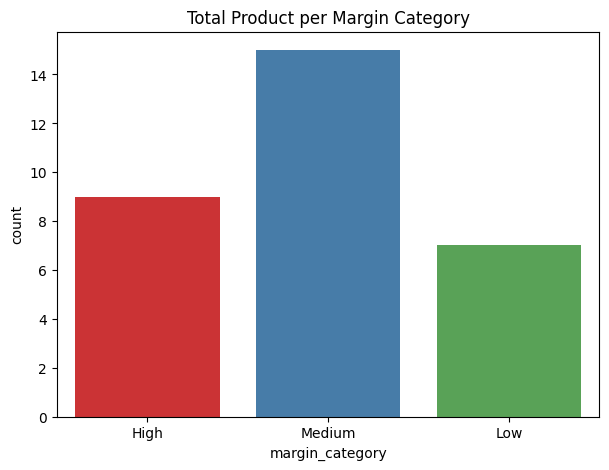

In [34]:
#Visualize margin category
plt.figure(figsize=(7,5))
sns.countplot(data=df_stock, x='margin_category', hue='margin_category', palette='Set1')
plt.title('Total Product per Margin Category')
plt.show()

**2. Stock Risk Analysis**

In [25]:
df_risk = pd.read_csv('stock.csv')

In [26]:
#Convert date column
df_risk['date'] = pd.to_datetime(df_risk['date'], format='%m/%d/%Y')

In [ ]:
#Filter for October
df_risk = df_risk[df_risk['date'].dt.month == 10]

In [28]:
#Group by product_name
df_risk = df_risk.groupby('product_name').agg({
    'unit_sold' : 'sum',
    'stock_available' : 'sum'
})

In [30]:
#Configure threshold with quartil
stock_Q3 = df_risk['stock_available'].quantile(0.75)
sold_Q1 = df_risk['unit_sold'].quantile(0.25)
sold_Q3 = df_risk['unit_sold'].quantile(0.75)

In [31]:
print(f"3 rd quartile from stock available is {stock_Q3}")
print(f"1 st quartile from unit sold is {sold_Q1}")
print(f"3 rd quartile from unit sold is {sold_Q3}")

3 rd quartile from stock available is 4016.5
1 st quartile from unit sold is 279.0
3 rd quartile from unit sold is 2204.0


In [ ]:
print(f"Unit is overstocked if stock available > {stock_Q3} and unit sold < {sold_Q1}")
print(f"Unit is lowerstocked if stock available > {stock_Q3} and unit sold > {sold_Q3}")

Unit is overstocked if stock available > 4016.5 and unit sold < 279.0
Unit is lowerstocked if stock available > 4016.5 and unit sold > 2204.0


In [36]:
#Stock risk classification
df_risk['stock_risk'] = df_risk.apply(
    lambda row: 'Overstocked' 
        if row['stock_available'] > stock_Q3
        and row['unit_sold'] < sold_Q1
        else 'Lowerstocked' if row['stock_available'] > stock_Q3
        and row['unit_sold'] > sold_Q3
        else 'Normal',
        axis=1 
)

In [37]:
df_risk

,unit_sold,stock_available,stock_risk
product_name,,,
Botol Minum DQLab,1522,3163,Normal
Buku Agenda DQLab,2523,4001,Normal
Dompet Kartu DQLab,115,601,Normal
Earphone Kantor DQLab,4713,6146,Lowerstocked
Gantungan Kunci DQLab,350,1392,Normal
Headset Kantor DQLab,1361,3379,Normal
Kalkulator Besar DQLab,1047,2335,Normal
Kartu Nama DQLab,3584,5313,Lowerstocked
Kartu Ucapan DQLab,114,952,Normal


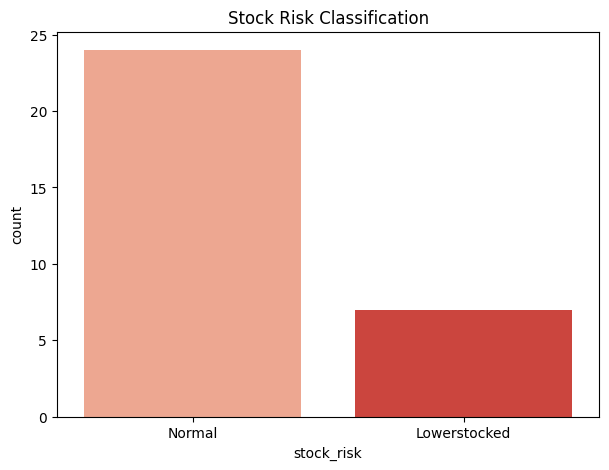

In [41]:
#Viusalize stock risk classification
plt.figure(figsize=(7,5))
sns.countplot(data=df_risk, x='stock_risk', hue='stock_risk', palette='Reds')
plt.title('Stock Risk Classification')
plt.show()

**3. Day of Inventory (DOI)**

In [42]:
df_doi = pd.read_csv('stock.csv')

In [43]:
#Convert date column
df_doi['date'] = pd.to_datetime(df_doi['date'], format='%m/%d/%Y')

In [46]:
#Filter for October
df_doi = df_doi[df_doi['date'].dt.month == 10]

In [47]:
#Group By product_name
df_doi = df_doi.groupby('product_name', as_index=False).agg({
    'unit_sold' : 'sum',
    'stock_available' : 'sum'
})

In [48]:
#replace 0 in unit_sold column
df_doi['unit_sold'] = df_doi['unit_sold'].replace(0, pd.NA)

In [52]:
#Calculate DOI
df_doi['doi'] = round(df_doi['stock_available'] / (df_doi['unit_sold']/30), 2)

In [53]:
df_doi

,product_name,unit_sold,stock_available,doi
0,Botol Minum DQLab,1522,3163,62.35
1,Buku Agenda DQLab,2523,4001,47.57
2,Dompet Kartu DQLab,115,601,156.78
3,Earphone Kantor DQLab,4713,6146,39.12
4,Gantungan Kunci DQLab,350,1392,119.31
5,Headset Kantor DQLab,1361,3379,74.48
6,Kalkulator Besar DQLab,1047,2335,66.91
7,Kartu Nama DQLab,3584,5313,44.47
8,Kartu Ucapan DQLab,114,952,250.53
9,Kertas Warna DQLab,248,918,111.05


In [54]:
#DOI classification
def class_doi(doi):
    if pd.isna(doi):
        return 'Unsold'
    elif doi <= 30:
        return 'Fast-selling'
    elif doi <= 90:
        return 'Normal'
    else:
        return 'Slow-selling'

df_doi['doi_category'] = df_doi['doi'].apply(class_doi)

In [55]:
df_doi

,product_name,unit_sold,stock_available,doi,doi_category
0,Botol Minum DQLab,1522,3163,62.35,Normal
1,Buku Agenda DQLab,2523,4001,47.57,Normal
2,Dompet Kartu DQLab,115,601,156.78,Slow-selling
3,Earphone Kantor DQLab,4713,6146,39.12,Normal
4,Gantungan Kunci DQLab,350,1392,119.31,Slow-selling
5,Headset Kantor DQLab,1361,3379,74.48,Normal
6,Kalkulator Besar DQLab,1047,2335,66.91,Normal
7,Kartu Nama DQLab,3584,5313,44.47,Normal
8,Kartu Ucapan DQLab,114,952,250.53,Slow-selling
9,Kertas Warna DQLab,248,918,111.05,Slow-selling


**Visualization**

In [59]:
df = pd.read_csv('stock.csv')

In [ ]:
df['margin'] = round(((df['price']-df['cost'])/df['price']) *100, 2)

In [61]:
#Group by product_name
df = df.groupby('product_name', as_index = False).agg({
    'margin': 'mean',
    'price': 'mean',
    'cost': 'mean',
    'stock_available': 'sum'
})


In [62]:
df = df.sort_values(by = 'margin', ascending = False)

In [ ]:
#Make margin classification
def margin_category(margin):
    if margin >= 40:
        return 'High'
    elif margin >= 20:
        return 'Medium'
    else:
        return 'Low'

df['margin_category'] = df['margin'].apply(margin_category)

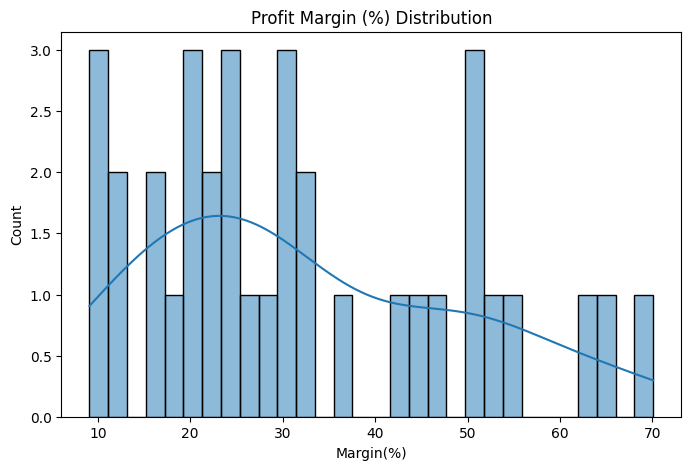

In [72]:
#visualize margin distribution
plt.figure(figsize=(8,5))
sns.histplot(df['margin'], bins=30, kde=True)
plt.title('Profit Margin (%) Distribution')
plt.xlabel('Margin(%)')
plt.show()


# Conclusion and Recommendations

## Conclusion
- The **Profit Margin Distribution** shows a wide variation:
  - Peaks around **10%**, **20–25%**, and **50%**, with smaller clusters at **30–35%** and **60–70%**.
  - The KDE curve is **not symmetric**, indicating a **non-normal distribution**.
  - Multiple peaks suggest that the company has **different product groups with distinct profitability levels**.
- **Margin Classification** confirms that products can be grouped into **High (≥40%)**, **Medium (20–40%)**, and **Low (<20%)** categories, which helps to differentiate pricing and cost strategies.
- **Stock Risk Analysis** highlights three inventory conditions:
  - **Overstocked** (high stock, low sales) → risk of holding costs.
  - **Lowerstocked** (high stock, high sales) → risk of potential stockout.
  - **Normal Stock** → balanced condition.
- **Day of Inventory (DOI) Analysis** segments sales velocity into:
  - **Unsold**: No movement at all.
  - **Fast-Selling** (≤30 days) → high demand.
  - **Normal-Selling** (31–90 days) → healthy cycle.
  - **Slow-Selling** (>90 days) → risk of stagnant stock.

## Recommendations
1. **Margin Strategy**
   - Focus on **High Margin** products to maximize profitability.
   - Reassess pricing or reduce costs for **Low Margin** items.
   - Monitor **Medium Margin** products for potential margin improvement.

2. **Stock Risk Management**
   - For **Overstocked** products → apply discounting, bundling, or promotions to accelerate sales.
   - For **Lowerstocked** products → prioritize replenishment to avoid losing sales opportunities.
   - For **Normal Stock** products → maintain current stock levels.

3. **Sales Velocity (DOI) Actions**
   - **Unsold**: Investigate product-market fit or consider phasing out.
   - **Fast-Selling**: Ensure adequate supply and monitor for potential price optimization.
   - **Normal-Selling**: Keep current inventory policies.
   - **Slow-Selling**: Evaluate marketing strategies, repositioning, or clearance actions.

---
Overall, combining **margin, stock risk, and DOI analyses** provides a strong foundation for **pricing, inventory, and sales strategies**, helping the company reduce risks and improve profitability.
